In [22]:
import json
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
sims = []
for path in os.listdir("data/evaluation_tests"):
    try:
        sims.append(json.load(open(f"data/evaluation_tests/{path}")))

    except:
        pass

df = pd.DataFrame(sims)

In [106]:
df.loc[df.routing_algorithm == 'RND', 'routing_algorithm'] = 'RANDOM'

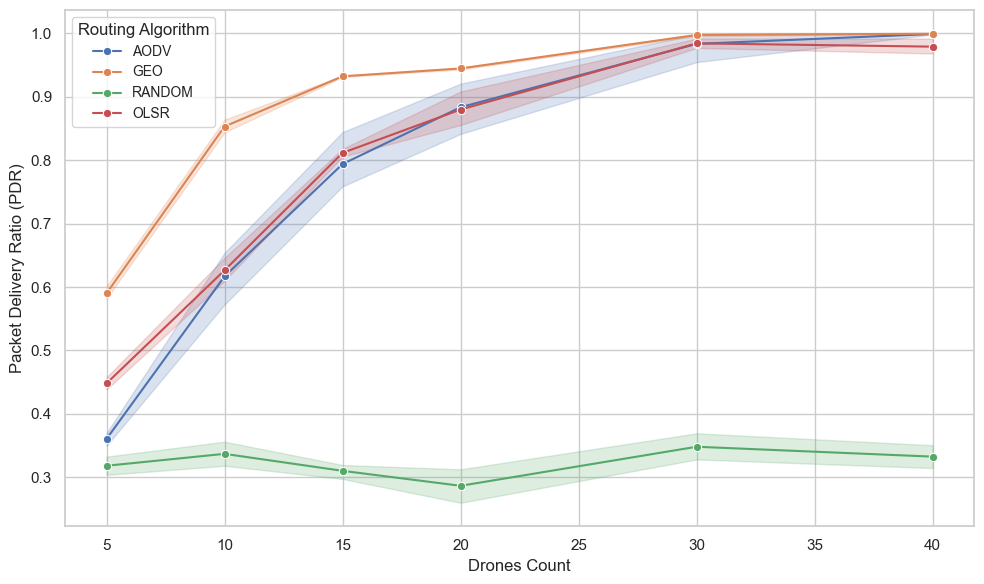

In [113]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='drones_count',
    y='pdr',
    hue='routing_algorithm',
    marker='o'
)

# Add labels and title
plt.xlabel('Drones Count', fontsize=12)
plt.ylabel('Packet Delivery Ratio (PDR)', fontsize=12)
#plt.title('PDR vs Drones Count by Routing Algorithm', fontsize=14)
plt.legend(title='Routing Algorithm', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

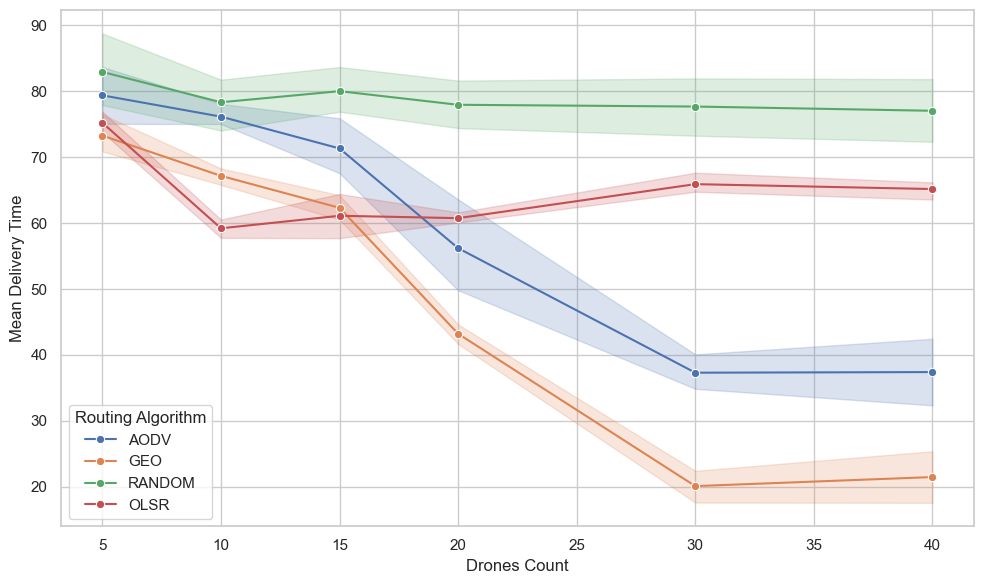

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x="drones_count",
    y="mean_delivery_time",
    hue="routing_algorithm",
    marker="o",  # Adds markers to the lines
)

# Add titles and labels
#plt.title("Mean Delivery Time vs. Drones Count by Algorithm", fontsize=16)
plt.xlabel("Drones Count", fontsize=12)
plt.ylabel("Mean Delivery Time", fontsize=12)
plt.legend(title="Routing Algorithm")
plt.tight_layout()

# Show the plot
plt.show()



/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/3364917020.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/3364917020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


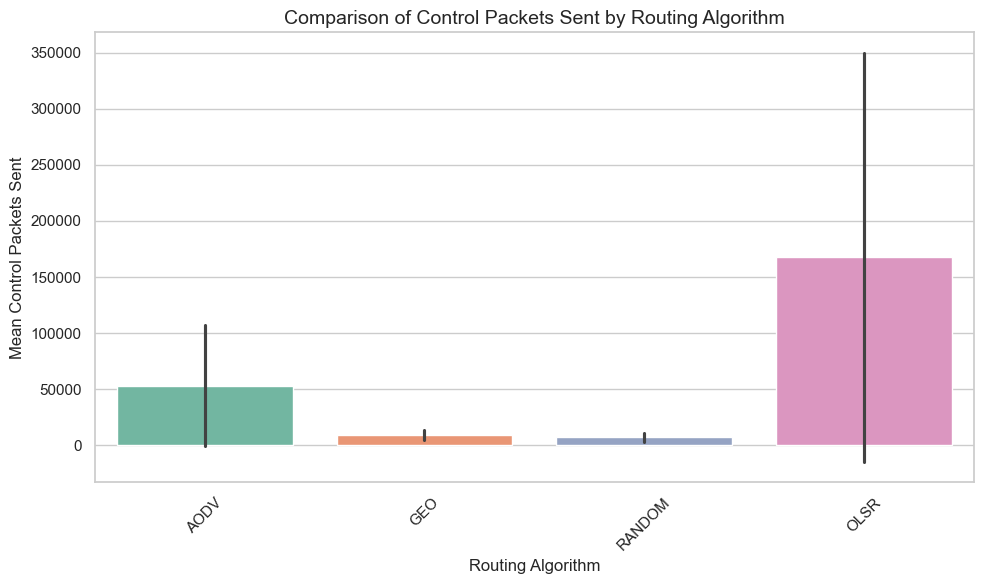

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='routing_algorithm',
    y='control_packets_count',
    estimator='mean',  # Change to 'sum' for total count instead of mean
    ci='sd',  # Display standard deviation as error bars
    palette='Set2'
)

# Add labels and title
plt.xlabel('Routing Algorithm', fontsize=12)
plt.ylabel('Mean Control Packets Sent', fontsize=12)
plt.title('Comparison of Control Packets Sent by Routing Algorithm', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/1551728892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


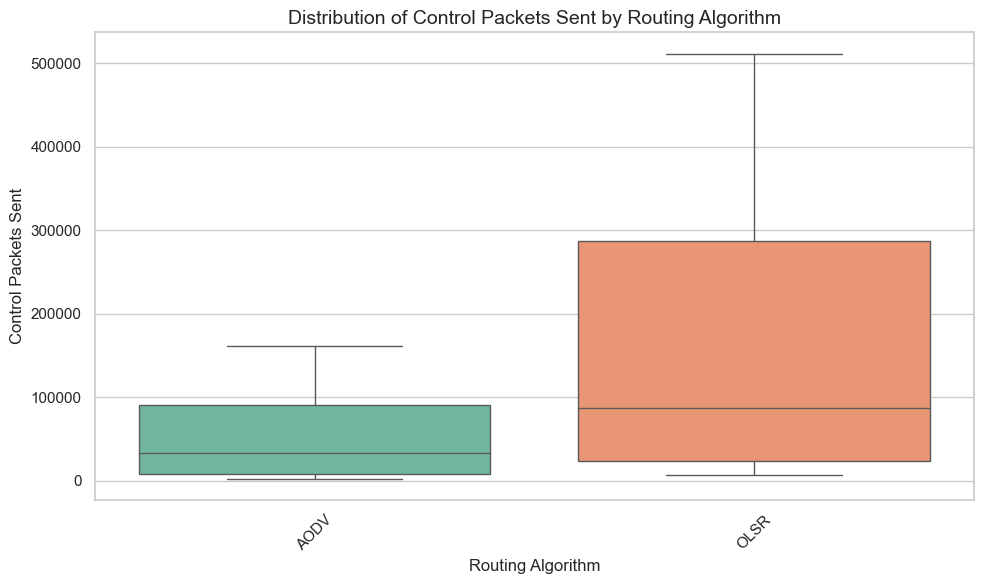

In [88]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df[df.routing_algorithm.isin(['OLSR', 'AODV'])],
    x='routing_algorithm',
    y='control_packets_count',
    palette='Set2'
)

# Add labels and title
plt.xlabel('Routing Algorithm', fontsize=12)
plt.ylabel('Control Packets Sent', fontsize=12)
plt.title('Distribution of Control Packets Sent by Routing Algorithm', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


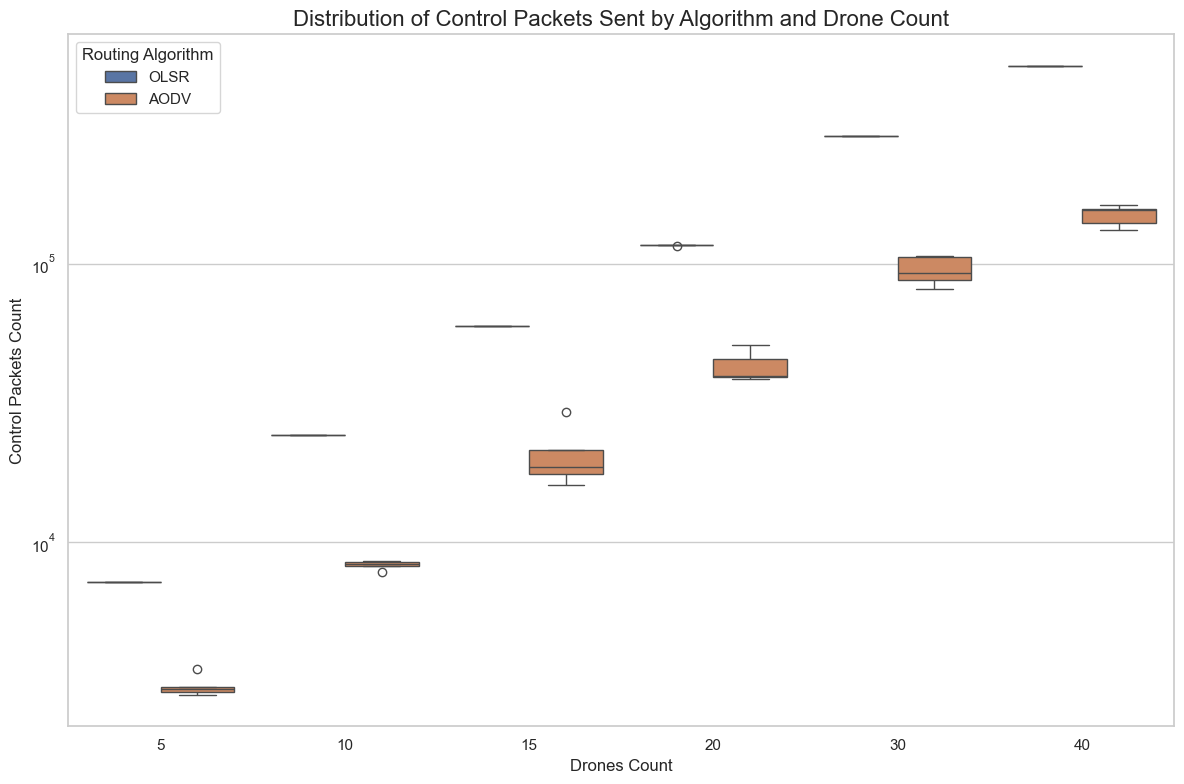

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df[df.routing_algorithm.isin(['OLSR', 'AODV'])],
    x="drones_count",
    y="control_packets_count",
    hue="routing_algorithm",
)

# Add titles and labels
plt.yscale("log")

plt.title("Distribution of Control Packets Sent by Algorithm and Drone Count", fontsize=16)
plt.xlabel("Drones Count", fontsize=12)
plt.ylabel("Control Packets Count", fontsize=12)
plt.legend(title="Routing Algorithm")
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/4254513797.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


([0, 1, 2], [Text(0, 0, 'AODV'), Text(1, 0, 'GEO'), Text(2, 0, 'OLSR')])

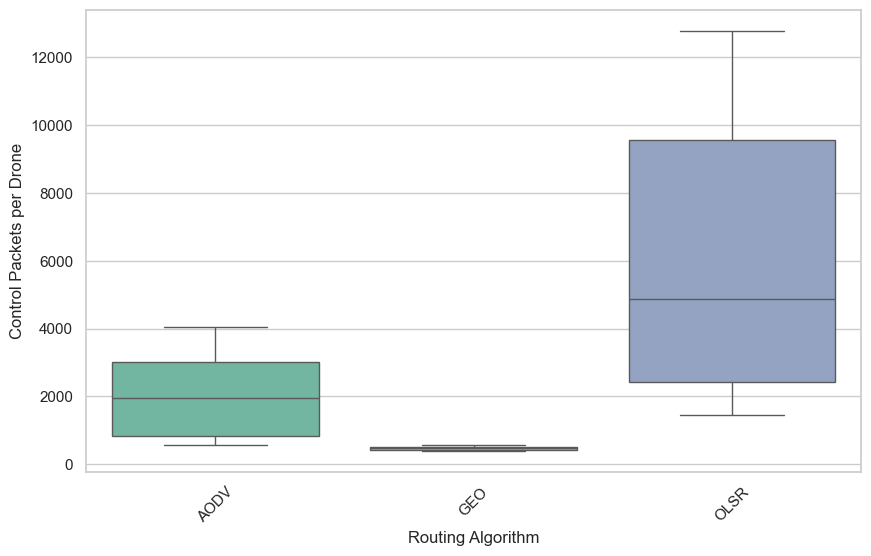

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a new column to the dataframe for the calculated metric
df['control_packets_per_drone'] = df['control_packets_count'] / df['drones_count']

# Filter out the rows with 'random' algorithm
filtered_df = df[df['routing_algorithm'] != 'RANDOM']

# Set the style for the plot
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=filtered_df,
    x="routing_algorithm",
    y="control_packets_per_drone",
    palette="Set2",
)

# Add titles and labels
#plt.title("Distribution of Control Packets per Drone by Algorithm (Excluding Random)", fontsize=16)
plt.xlabel("Routing Algorithm", fontsize=12)
plt.ylabel("Control Packets per Drone", fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
)


# Add title
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


ValueError: could not convert string to float: 'AODV'

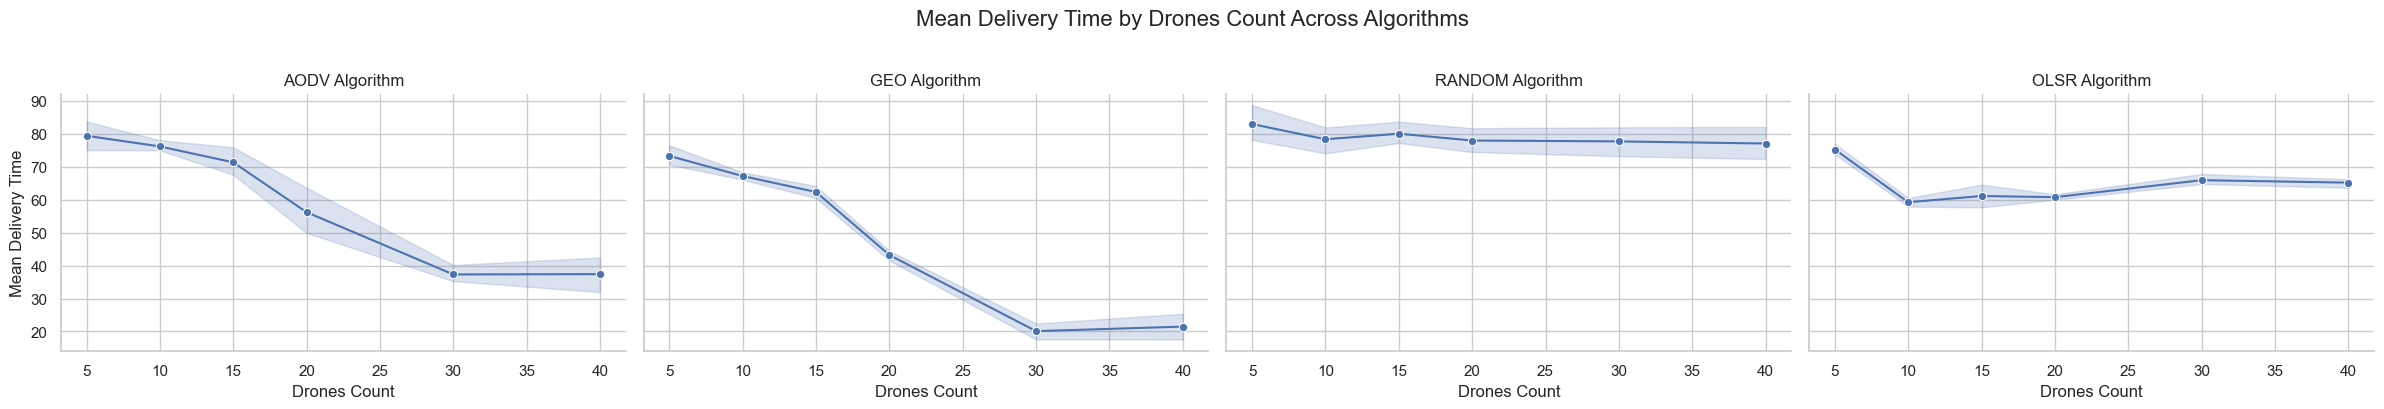

In [90]:
g = sns.FacetGrid(df, col="routing_algorithm", height=4, aspect=1.5)
g.map(sns.lineplot, "drones_count", "mean_delivery_time", marker="o")

# Add titles and labels
g.set_axis_labels("Drones Count", "Mean Delivery Time")
g.set_titles("{col_name} Algorithm")
g.fig.suptitle("Mean Delivery Time by Drones Count Across Algorithms", y=1.02, fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/825431822.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(
/var/folders/lk/_j9lgk5136z4zgb2q80qdykr0000gn/T/ipykernel_52681/825431822.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


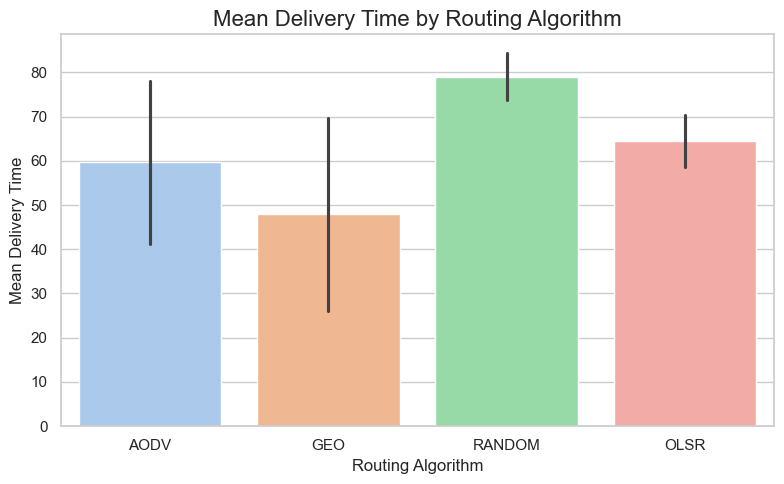

In [91]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="routing_algorithm",
    y="mean_delivery_time",
    ci="sd",
    palette="pastel",
)

# Add titles and labels
plt.title("Mean Delivery Time by Routing Algorithm", fontsize=16)
plt.xlabel("Routing Algorithm", fontsize=12)
plt.ylabel("Mean Delivery Time", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()



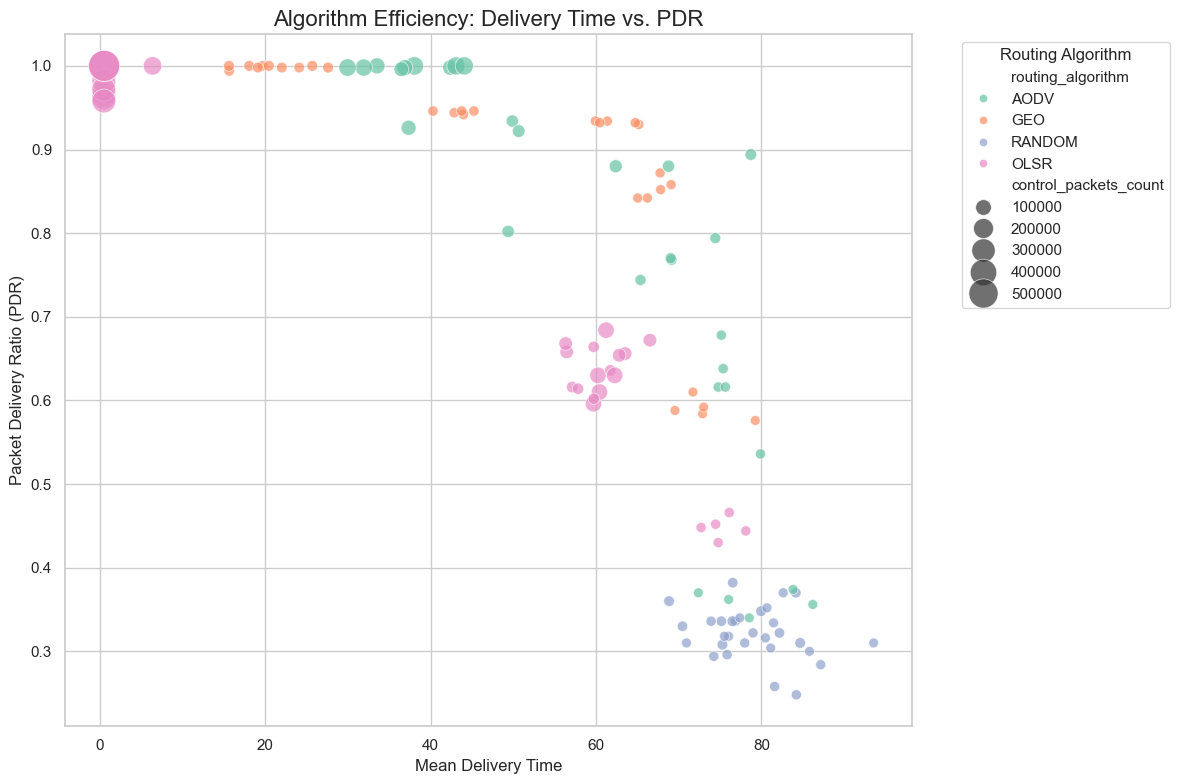

In [77]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="mean_delivery_time",
    y="pdr",
    hue="routing_algorithm",
    size="control_packets_count",
    sizes=(50, 500),
    alpha=0.7,
    palette="Set2",
)

# Add titles and labels
plt.title("Algorithm Efficiency: Delivery Time vs. PDR", fontsize=16)
plt.xlabel("Mean Delivery Time", fontsize=12)
plt.ylabel("Packet Delivery Ratio (PDR)", fontsize=12)
plt.legend(title="Routing Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()